In [348]:
import numpy as np
import pandas as pd

import nltk
nltk.download('popular')

import spacy
from nltk.stem import SnowballStemmer
stem_en = SnowballStemmer("english")

import re

stopwordsenglish = nltk.corpus.stopwords.words("english")
nlp = spacy.load('en_core_web_sm')

import requests


########## test

from wordcloud import WordCloud
import matplotlib.pyplot as plt
import seaborn as sns

import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import accuracy_score,precision_score,recall_score,confusion_matrix,roc_curve,classification_report
from scikitplot.metrics import plot_confusion_matrix


#######

import text2emotion as te

[nltk_data] Downloading collection 'popular'
[nltk_data]    | 
[nltk_data]    | Downloading package cmudict to
[nltk_data]    |     C:\Users\Berenger\AppData\Roaming\nltk_data...
[nltk_data]    |   Package cmudict is already up-to-date!
[nltk_data]    | Downloading package gazetteers to
[nltk_data]    |     C:\Users\Berenger\AppData\Roaming\nltk_data...
[nltk_data]    |   Package gazetteers is already up-to-date!
[nltk_data]    | Downloading package genesis to
[nltk_data]    |     C:\Users\Berenger\AppData\Roaming\nltk_data...
[nltk_data]    |   Package genesis is already up-to-date!
[nltk_data]    | Downloading package gutenberg to
[nltk_data]    |     C:\Users\Berenger\AppData\Roaming\nltk_data...
[nltk_data]    |   Package gutenberg is already up-to-date!
[nltk_data]    | Downloading package inaugural to
[nltk_data]    |     C:\Users\Berenger\AppData\Roaming\nltk_data...
[nltk_data]    |   Package inaugural is already up-to-date!
[nltk_data]    | Downloading package movie_reviews to

In [349]:
df_august = pd.read_csv("https://raw.githubusercontent.com/CathieLC/Happy_four_friends/main/Dataset/ManoMano%20-%20August%202021.csv?token=GHSAT0AAAAAABMXSZJMU35CES7HVZWAJODMYPRFTPA")
df_september = pd.read_csv("https://raw.githubusercontent.com/CathieLC/Happy_four_friends/main/Dataset/ManoMano%20-%20September%202021.csv?token=GHSAT0AAAAAABMXSZJMUP5FCAR47B6L2AEQYPRFU5Q")
df_october = pd.read_csv("https://raw.githubusercontent.com/CathieLC/Happy_four_friends/main/Dataset/ManoMano%20-%20October%202021.csv?token=GHSAT0AAAAAABMXSZJMRDZONS4ZZPZ4U72UYPRFVFQ")
df_november = pd.read_csv("https://raw.githubusercontent.com/CathieLC/Happy_four_friends/main/Dataset/ManoMano%20-%20November%202021.csv?token=GHSAT0AAAAAABMXSZJM57XIDQDMXJ3CA5IKYPRFVMA")


C:\Users\Berenger\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3441: DtypeWarning:

Columns (13) have mixed types.Specify dtype option on import or set low_memory=False.



In [350]:
# Concatenation of all dataset
frames = [df_august, df_september, df_october, df_november]
df_total = pd.concat(frames)
# Display all columns when exploring datasets
pd.set_option('display.max_columns', None)

In [351]:
print (df_august.shape)
print (df_september.shape)
print (df_october.shape)
print (df_november.shape)

(17652, 35)
(19867, 34)
(24663, 34)
(33000, 34)


In [352]:
df_total["first_order"].value_counts(normalize=True)

False    0.561146
True     0.438854
Name: first_order, dtype: float64

In [353]:
df_total["csat_presales"].value_counts(normalize=True)

FALSE      0.996312
good       0.003015
neutral    0.000399
bad        0.000273
Name: csat_presales, dtype: float64

In [354]:
df_total["has_presales_contact"].value_counts(normalize=True)

False    0.990807
True     0.009193
Name: has_presales_contact, dtype: float64

In [355]:
df_total["has_manodvisor_contact"].value_counts(normalize=True)

False    0.998319
True     0.001681
Name: has_manodvisor_contact, dtype: float64

In [356]:
df_total.head()

,id,comment,original_comment,score,data_scale,data_source,created_at,date,day,month,is_mf,device,family,is_b2b,reason,browser,zipcode,category,language,platform,provider,first_order,nb_articles,csat_presales,shipping_fees,bv_transaction,payment_method,operating_system,last_paid_channel,has_presales_contact,shipping_fees_bucket,bv_transaction_bucket,has_manodvisor_contact,themes,tags
0,295564331,NaN,NaN,10,NPS,Customer Effort Score,2021-08-01T00:02:13.000Z,2021-08-01,dimanche,août,False,phone,Mobilier d'intérieur,False,NaN,Google 170.0.386351093,BT80 9DH,Meuble de salle à manger,Unknown,GB,Deuba (GB),True,1,FALSE,0,"119,95",paypal,iOS 14.6,SHOPBOT,False,0,101 - 150,False,NaN,NaN
1,295563489,NaN,NaN,10,NPS,Customer Effort Score,2021-08-01T00:04:10.000Z,2021-08-01,dimanche,août,False,desktop,Mobilier d'intérieur,False,NaN,Chrome 92.0.4515,SO31 9LB,Meuble de bureau,Unknown,GB,Songmics (GB),True,1,FALSE,0,"99,99",mastercard,Windows 10,SHOPBOT,False,0,1 - 100,False,NaN,NaN
2,295564358,NaN,NaN,8,NPS,Customer Effort Score,2021-08-01T00:15:48.000Z,2021-08-01,dimanche,août,False,desktop,Mobilier d'intérieur,False,NaN,Chrome 92.0.4515,64160,Meuble de salle à manger,Unknown,FR,vidaXL (FR),True,1,FALSE,0,"84,99",visa,Windows 10,AFFILIATION,False,0,1 - 100,False,NaN,NaN
3,295563988,NaN,NaN,5,NPS,Customer Effort Score,2021-08-01T02:04:17.000Z,2021-08-01,dimanche,août,False,phone,Jardin piscine,False,I had trouble signing up or logging in,Mobile Safari 14.1,HU13 9LT,Mobilier de jardin et jeux,Unknown,GB,Agito UK (GB),True,1,FALSE,0,"92,99",visa,iOS 14.5.1,SHOPBOT,False,0,1 - 100,False,NaN,Detractor '- Signup/Login
4,295562040,NaN,NaN,10,NPS,Customer Effort Score,2021-08-01T02:38:07.000Z,2021-08-01,dimanche,août,False,desktop,Plomberie chauffage,False,NaN,Chrome 92.0.4515,14480,Chauffage et climatisation,Unknown,FR,Ecoland's (FR),False,1,FALSE,"1,92","8,3",paypal,Windows 10,SEM,False,1 - 5,1 - 100,False,NaN,NaN


In [357]:
df_total.isna().sum()

id                            0
comment                   83675
original_comment          83386
score                         0
data_scale                    0
data_source                   0
created_at                    0
date                          0
day                           0
month                         0
is_mf                         0
device                        0
family                        6
is_b2b                      674
reason                    91206
browser                       0
zipcode                   77530
category                      6
language                      0
platform                      0
provider                      6
first_order                   0
nb_articles                   0
csat_presales                 0
shipping_fees                 0
bv_transaction                0
payment_method                0
operating_system              0
last_paid_channel           722
has_presales_contact          0
shipping_fees_bucket          0
bv_trans

In [358]:
df_comments = df_total.dropna(subset=["comment"])
df_comments

,id,comment,original_comment,score,data_scale,data_source,created_at,date,day,month,is_mf,device,family,is_b2b,reason,browser,zipcode,category,language,platform,provider,first_order,nb_articles,csat_presales,shipping_fees,bv_transaction,payment_method,operating_system,last_paid_channel,has_presales_contact,shipping_fees_bucket,bv_transaction_bucket,has_manodvisor_contact,themes,tags
15,295562096,Clear and accurate... thank you.,Clair et précis..... merci,10,NPS,Customer Effort Score,2021-08-01T06:05:11.000Z,2021-08-01,dimanche,août,False,phone,Jardin piscine,False,NaN,Chrome Mobile 92.0.4515,7700,Barbecue et plancha,French,FR,vidaXL (FR),False,2,FALSE,0,"102,49",visa,Android 8.0.0,SEM,False,0,101 - 150,False,Delivery > Order Accuracy > 1;Online Experience > Design / Layout > 1,NaN
23,295562415,All right.,Très bien,9,NPS,Customer Effort Score,2021-08-01T06:33:25.000Z,2021-08-01,dimanche,août,False,desktop,Jardin piscine,False,NaN,Edge 92.0.902,55300,Matériel d'arrosage et récupérateurs d'eau,French,FR,Multitanks (FR),False,1,FALSE,0,"44,55",paypal,Windows 10,SHOPBOT,False,0,1 - 100,False,Service > General Satisfaction > 1,NaN
24,295563199,All right.,trés bien,9,NPS,Customer Effort Score,2021-08-01T06:34:44.000Z,2021-08-01,dimanche,août,False,desktop,Construction matériaux,False,NaN,Edge 92.0.902,55300,"Toiture, gouttière et bardage",French,FR,Briday FR (FR),False,1,FALSE,0,"24,89",paypal,Windows 10,SHOPBOT,False,0,1 - 100,False,Service > General Satisfaction > 1,NaN
36,295562240,First class service. Have a gold medal.,First class service. Have a gold medal.,10,NPS,Customer Effort Score,2021-08-01T07:09:21.000Z,2021-08-01,dimanche,août,False,desktop,Plomberie chauffage,False,NaN,Firefox 89.0,SN16 9JZ,Chauffage et climatisation,English,GB,DIRECT2PUBLIK LTD (GB),False,1,FALSE,0,"17,95",paypal,Mac OS X 10.13,EMAIL,False,0,1 - 100,False,Service > General Satisfaction > 1,NaN
39,295562144,Perfect except 2 sends different for an order,Parfait sauf 2 envoie différent pour une commande,9,NPS,Customer Effort Score,2021-08-01T07:19:17.000Z,2021-08-01,dimanche,août,True,tablet,Plomberie chauffage,False,NaN,Chrome 92.0.4515,26100,Robinetterie,French,FR,Silamp (FR),False,2,FALSE,0,"101,78",visa,Android 11,SEM,False,0,101 - 150,False,Service > General Satisfaction > 1;Delivery > Quality > -1,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32940,369056375,Very simple and practical,Molto semplice e pratico,10,NPS,Customer Effort Score,2021-11-30T21:48:12.000Z,2021-11-30,mardi,novembre,False,phone,Jardin piscine,False,NaN,Chrome Mobile WebView 96.0.4664,NaN,Mobilier de jardin et jeux,Italian,IT,Produce Shop (IT),False,1,neutral,0,"69,95",mastercard,Android 11,AFFILIATION,False,0,1 - 100,False,Service > Convenience > 1;Online Experience > Ease of Use > 1,NaN
32966,369050246,"All right, both the attention and the simplicity of the purchase.","Todo correcto, tanto la atención como la sencillez de la compra.",10,NPS,Customer Effort Score,2021-11-30T22:22:47.000Z,2021-11-30,mardi,novembre,False,desktop,Mobilier d'intérieur,False,NaN,Chrome 96.0.4664,NaN,Linge de maison,Spanish,ES,WilTec (ES),False,1,FALSE,"13,99","50,17",mastercard,Windows 10,SHOPBOT,False,11 - 20,1 - 100,False,Online Experience > Ease of Use > 1;Support > Attitude of staff > 1,NaN
32974,369045220,Always correct and punctual!,Sempre corretti e puntuali!,10,NPS,Customer Effort Score,2021-11-30T22:33:37.000Z,2021-11-30,mardi,novembre,False,desktop,Jardin piscine,True,NaN,Safari 14.1.1,NaN,Plante et soin des végétaux,Italian,IT,Eacommerce (IT),False,1,FALSE,"5,9","30,86",paypal,Mac OS X 10.15.6,SHOPBOT,False,1 - 5,1 - 100,False,Delivery > Speed of delivery > 1;Delivery > Order Accuracy > 1,NaN
32981,369057301,My payment method didn't work as planned.,Il mio metodo di pagamento non ha funzionato come previsto.,3,NPS,Customer Effort Score,2021-11-30T22:46:29.000Z,2021-11-30,mardi,novembre,F

In [359]:
def func_clean(sentence):
  sentence = re.sub(r'[^\w\s]','',str(sentence))
  sentence = nltk.word_tokenize(sentence.lower())
  newsentence = ""
  tokens_clean = []
  for words in sentence:
    if words not in stopwordsenglish:
      tokens_clean.append(words)
  tokens_clean2 = ' '.join([str(item) for item in tokens_clean])
  sent_tokens = nlp(tokens_clean2)
  for token in sent_tokens:
    newsentence = newsentence + " " + (token.lemma_)
  return newsentence

In [360]:
df_comments2 = df_comments
df_comments2["comment"] = df_comments2["comment"].apply(func_clean)
df_comments2

C:\Users\Berenger\AppData\Local\Temp/ipykernel_20536/222912662.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,id,comment,original_comment,score,data_scale,data_source,created_at,date,day,month,is_mf,device,family,is_b2b,reason,browser,zipcode,category,language,platform,provider,first_order,nb_articles,csat_presales,shipping_fees,bv_transaction,payment_method,operating_system,last_paid_channel,has_presales_contact,shipping_fees_bucket,bv_transaction_bucket,has_manodvisor_contact,themes,tags
15,295562096,clear accurate thank,Clair et précis..... merci,10,NPS,Customer Effort Score,2021-08-01T06:05:11.000Z,2021-08-01,dimanche,août,False,phone,Jardin piscine,False,NaN,Chrome Mobile 92.0.4515,7700,Barbecue et plancha,French,FR,vidaXL (FR),False,2,FALSE,0,"102,49",visa,Android 8.0.0,SEM,False,0,101 - 150,False,Delivery > Order Accuracy > 1;Online Experience > Design / Layout > 1,NaN
23,295562415,right,Très bien,9,NPS,Customer Effort Score,2021-08-01T06:33:25.000Z,2021-08-01,dimanche,août,False,desktop,Jardin piscine,False,NaN,Edge 92.0.902,55300,Matériel d'arrosage et récupérateurs d'eau,French,FR,Multitanks (FR),False,1,FALSE,0,"44,55",paypal,Windows 10,SHOPBOT,False,0,1 - 100,False,Service > General Satisfaction > 1,NaN
24,295563199,right,trés bien,9,NPS,Customer Effort Score,2021-08-01T06:34:44.000Z,2021-08-01,dimanche,août,False,desktop,Construction matériaux,False,NaN,Edge 92.0.902,55300,"Toiture, gouttière et bardage",French,FR,Briday FR (FR),False,1,FALSE,0,"24,89",paypal,Windows 10,SHOPBOT,False,0,1 - 100,False,Service > General Satisfaction > 1,NaN
36,295562240,first class service gold medal,First class service. Have a gold medal.,10,NPS,Customer Effort Score,2021-08-01T07:09:21.000Z,2021-08-01,dimanche,août,False,desktop,Plomberie chauffage,False,NaN,Firefox 89.0,SN16 9JZ,Chauffage et climatisation,English,GB,DIRECT2PUBLIK LTD (GB),False,1,FALSE,0,"17,95",paypal,Mac OS X 10.13,EMAIL,False,0,1 - 100,False,Service > General Satisfaction > 1,NaN
39,295562144,perfect except 2 send different order,Parfait sauf 2 envoie différent pour une commande,9,NPS,Customer Effort Score,2021-08-01T07:19:17.000Z,2021-08-01,dimanche,août,True,tablet,Plomberie chauffage,False,NaN,Chrome 92.0.4515,26100,Robinetterie,French,FR,Silamp (FR),False,2,FALSE,0,"101,78",visa,Android 11,SEM,False,0,101 - 150,False,Service > General Satisfaction > 1;Delivery > Quality > -1,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32940,369056375,simple practical,Molto semplice e pratico,10,NPS,Customer Effort Score,2021-11-30T21:48:12.000Z,2021-11-30,mardi,novembre,False,phone,Jardin piscine,False,NaN,Chrome Mobile WebView 96.0.4664,NaN,Mobilier de jardin et jeux,Italian,IT,Produce Shop (IT),False,1,neutral,0,"69,95",mastercard,Android 11,AFFILIATION,False,0,1 - 100,False,Service > Convenience > 1;Online Experience > Ease of Use > 1,NaN
32966,369050246,right attention simplicity purchase,"Todo correcto, tanto la atención como la sencillez de la compra.",10,NPS,Customer Effort Score,2021-11-30T22:22:47.000Z,2021-11-30,mardi,novembre,False,desktop,Mobilier d'intérieur,False,NaN,Chrome 96.0.4664,NaN,Linge de maison,Spanish,ES,WilTec (ES),False,1,FALSE,"13,99","50,17",mastercard,Windows 10,SHOPBOT,False,11 - 20,1 - 100,False,Online Experience > Ease of Use > 1;Support > Attitude of staff > 1,NaN
32974,369045220,always correct punctual,Sempre corretti e puntuali!,10,NPS,Customer Effort Score,2021-11-30T22:33:37.000Z,2021-11-30,mardi,novembre,False,desktop,Jardin piscine,True,NaN,Safari 14.1.1,NaN,Plante et soin des végétaux,Italian,IT,Eacommerce (IT),False,1,FALSE,"5,9","30,86",paypal,Mac OS X 10.15.6,SHOPBOT,False,1 - 5,1 - 100,False,Delivery > Speed of delivery > 1;Delivery > Order Accuracy > 1,NaN
32981,369057301,payment method do not work plan,Il mio metodo di pagamento non ha funzionato come previsto.,3,NPS,Customer Effort Score,2021-11-30T22:46:29.000Z,2021-11-30,mardi,novembre,False,desktop,Luminaire,True,Ho avuto problemi ad iscrivermi o ad accedere.,Chrome 96.0.4664,NaN

In [361]:
my_text = ""

for i in df_comments2["comment"]:
    my_text+=i
 

In [362]:
nlp = spacy.load('en_core_web_sm')

sent_tokens = nlp(my_text)

lemma_lst = []

for token in sent_tokens:
  lemma_lst.append(token.lemma_)

lemma_freq = nltk.FreqDist(lemma_lst)

lemma_freq

FreqDist({'easy': 2328, 'order': 1639, 'good': 1106, 'fast': 1032, 'delivery': 993, 'product': 904, 'simple': 887, 'site': 857, 'thank': 806, 'well': 594, ...})

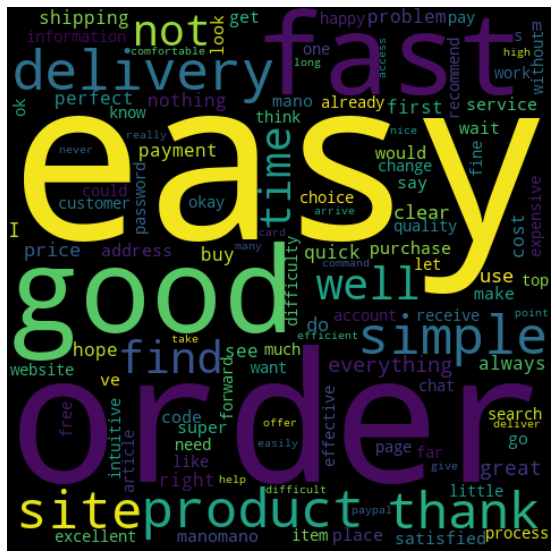

In [363]:
wordcloud = WordCloud(width=480, height=480, max_font_size=200, min_font_size=10)


wordcloud.generate_from_frequencies(lemma_freq)

plt.figure(figsize=(12, 10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [364]:
df_sentiment = df_comments[["id", "comment", "score"]]
df_sentiment

,id,comment,score
15,295562096,clear accurate thank,10
23,295562415,right,9
24,295563199,right,9
36,295562240,first class service gold medal,10
39,295562144,perfect except 2 send different order,9
...,...,...,...
32940,369056375,simple practical,10
32966,369050246,right attention simplicity purchase,10
32974,369045220,always correct punctual,10
32981,369057301,payment method do not work plan,3


In [365]:
##df_sentiment.to_csv(r'C:\Users\Berenger\Desktop\team_happy_four_friends\df_sentiment.csv', index = False, header = True)

In [366]:
print (df_sentiment.iloc[3,1])
te.get_emotion(df_sentiment.iloc[3,1])

 first class service gold medal


{'Happy': 0.0, 'Angry': 0.0, 'Surprise': 1.0, 'Sad': 0.0, 'Fear': 0.0}

In [367]:
df_sentiment["sentiment"] = df_sentiment["comment"].apply(te.get_emotion)
df_sentiment

C:\Users\Berenger\AppData\Local\Temp/ipykernel_20536/3877777142.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,id,comment,score,sentiment
15,295562096,clear accurate thank,10,"{'Happy': 0.0, 'Angry': 0.0, 'Surprise': 0.0, 'Sad': 1.0, 'Fear': 0.0}"
23,295562415,right,9,"{'Happy': 0.0, 'Angry': 0.0, 'Surprise': 0.0, 'Sad': 0.0, 'Fear': 1.0}"
24,295563199,right,9,"{'Happy': 0.0, 'Angry': 0.0, 'Surprise': 0.0, 'Sad': 0.0, 'Fear': 1.0}"
36,295562240,first class service gold medal,10,"{'Happy': 0.0, 'Angry': 0.0, 'Surprise': 1.0, 'Sad': 0.0, 'Fear': 0.0}"
39,295562144,perfect except 2 send different order,9,"{'Happy': 0.0, 'Angry': 0.0, 'Surprise': 0.0, 'Sad': 0.5, 'Fear': 0.5}"
...,...,...,...,...
32940,369056375,simple practical,10,"{'Happy': 0.0, 'Angry': 0.0, 'Surprise': 0.0, 'Sad': 0.0, 'Fear': 1.0}"
32966,369050246,right attention simplicity purchase,10,"{'Happy': 0.0, 'Angry': 0.0, 'Surprise': 0.0, 'Sad': 0.0, 'Fear': 1.0}"
32974,369045220,always correct punctual,10,"{'Happy': 0.0, 'Angry': 0.0, 'Surprise': 0.0, 'Sad': 1.0, 'Fear': 0.0}"
32981,369057301,payment method do not work plan,3,"{'Happy': 0.0, 'Angry': 0.0, 'Surprise': 0.0, 'Sad': 0.0, 'Fear': 1.0}"


In [368]:
df_sentiment2 = df_sentiment.copy()

In [369]:
df_sentiment2

,id,comment,score,sentiment
15,295562096,clear accurate thank,10,"{'Happy': 0.0, 'Angry': 0.0, 'Surprise': 0.0, 'Sad': 1.0, 'Fear': 0.0}"
23,295562415,right,9,"{'Happy': 0.0, 'Angry': 0.0, 'Surprise': 0.0, 'Sad': 0.0, 'Fear': 1.0}"
24,295563199,right,9,"{'Happy': 0.0, 'Angry': 0.0, 'Surprise': 0.0, 'Sad': 0.0, 'Fear': 1.0}"
36,295562240,first class service gold medal,10,"{'Happy': 0.0, 'Angry': 0.0, 'Surprise': 1.0, 'Sad': 0.0, 'Fear': 0.0}"
39,295562144,perfect except 2 send different order,9,"{'Happy': 0.0, 'Angry': 0.0, 'Surprise': 0.0, 'Sad': 0.5, 'Fear': 0.5}"
...,...,...,...,...
32940,369056375,simple practical,10,"{'Happy': 0.0, 'Angry': 0.0, 'Surprise': 0.0, 'Sad': 0.0, 'Fear': 1.0}"
32966,369050246,right attention simplicity purchase,10,"{'Happy': 0.0, 'Angry': 0.0, 'Surprise': 0.0, 'Sad': 0.0, 'Fear': 1.0}"
32974,369045220,always correct punctual,10,"{'Happy': 0.0, 'Angry': 0.0, 'Surprise': 0.0, 'Sad': 1.0, 'Fear': 0.0}"
32981,369057301,payment method do not work plan,3,"{'Happy': 0.0, 'Angry': 0.0, 'Surprise': 0.0, 'Sad': 0.0, 'Fear': 1.0}"


In [370]:
df_sentiment2.reset_index(inplace=True)



In [371]:
df_sentiment2[["happy", "angry", "surprise", "sad", "fear"]] = 0

In [372]:
df_sentiment2

,index,id,comment,score,sentiment,happy,angry,surprise,sad,fear
0,15,295562096,clear accurate thank,10,"{'Happy': 0.0, 'Angry': 0.0, 'Surprise': 0.0, 'Sad': 1.0, 'Fear': 0.0}",0,0,0,0,0
1,23,295562415,right,9,"{'Happy': 0.0, 'Angry': 0.0, 'Surprise': 0.0, 'Sad': 0.0, 'Fear': 1.0}",0,0,0,0,0
2,24,295563199,right,9,"{'Happy': 0.0, 'Angry': 0.0, 'Surprise': 0.0, 'Sad': 0.0, 'Fear': 1.0}",0,0,0,0,0
3,36,295562240,first class service gold medal,10,"{'Happy': 0.0, 'Angry': 0.0, 'Surprise': 1.0, 'Sad': 0.0, 'Fear': 0.0}",0,0,0,0,0
4,39,295562144,perfect except 2 send different order,9,"{'Happy': 0.0, 'Angry': 0.0, 'Surprise': 0.0, 'Sad': 0.5, 'Fear': 0.5}",0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
11502,32940,369056375,simple practical,10,"{'Happy': 0.0, 'Angry': 0.0, 'Surprise': 0.0, 'Sad': 0.0, 'Fear': 1.0}",0,0,0,0,0
11503,32966,369050246,right attention simplicity purchase,10,"{'Happy': 0.0, 'Angry': 0.0, 'Surprise': 0.0, 'Sad': 0.0, 'Fear': 1.0}",0,0,0,0,0
11504,32974,369045220,always correct punctual,10,"{'Happy': 0.0, 'Angry': 0.0, 'Surprise': 0.0, 'Sad': 1.0, 'Fear': 0.0}",0,0,0,0,0
11505,32981,369057301,payment method do not work plan,3,"{'Happy': 0.0, 'Angry': 0.0, 'Surprise': 0.0, 'Sad': 0.0, 'Fear': 1.0}",0,0,0,0,0


In [373]:
for i in range(len(df_sentiment2["sentiment"])):
    column_number = 5
    for z in df_sentiment2["sentiment"][i]:
        df_sentiment2.iloc[i, column_number] = df_sentiment2["sentiment"][i][z]
        column_number+=1


In [374]:
df_sentiment2.set_index("index", inplace=True)

In [375]:
df_comments2["happy"] = df_sentiment2["happy"]
df_comments2["angry"] = df_sentiment2["angry"]
df_comments2["surprise"] = df_sentiment2["surprise"]
df_comments2["sad"] = df_sentiment2["sad"]
df_comments2["fear"] = df_sentiment2["fear"]

C:\Users\Berenger\AppData\Local\Temp/ipykernel_20536/969476649.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\Berenger\AppData\Local\Temp/ipykernel_20536/969476649.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\Berenger\AppData\Local\Temp/ipykernel_20536/969476649.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org

In [376]:
df_comments2.head()

,id,comment,original_comment,score,data_scale,data_source,created_at,date,day,month,is_mf,device,family,is_b2b,reason,browser,zipcode,category,language,platform,provider,first_order,nb_articles,csat_presales,shipping_fees,bv_transaction,payment_method,operating_system,last_paid_channel,has_presales_contact,shipping_fees_bucket,bv_transaction_bucket,has_manodvisor_contact,themes,tags,happy,angry,surprise,sad,fear
15,295562096,clear accurate thank,Clair et précis..... merci,10,NPS,Customer Effort Score,2021-08-01T06:05:11.000Z,2021-08-01,dimanche,août,False,phone,Jardin piscine,False,NaN,Chrome Mobile 92.0.4515,7700,Barbecue et plancha,French,FR,vidaXL (FR),False,2,FALSE,0,"102,49",visa,Android 8.0.0,SEM,False,0,101 - 150,False,Delivery > Order Accuracy > 1;Online Experience > Design / Layout > 1,NaN,0.0,0.0,0.0,1.0,0.0
23,295562415,right,Très bien,9,NPS,Customer Effort Score,2021-08-01T06:33:25.000Z,2021-08-01,dimanche,août,False,desktop,Jardin piscine,False,NaN,Edge 92.0.902,55300,Matériel d'arrosage et récupérateurs d'eau,French,FR,Multitanks (FR),False,1,FALSE,0,"44,55",paypal,Windows 10,SHOPBOT,False,0,1 - 100,False,Service > General Satisfaction > 1,NaN,0.0,0.0,0.0,0.0,1.0
24,295563199,right,trés bien,9,NPS,Customer Effort Score,2021-08-01T06:34:44.000Z,2021-08-01,dimanche,août,False,desktop,Construction matériaux,False,NaN,Edge 92.0.902,55300,"Toiture, gouttière et bardage",French,FR,Briday FR (FR),False,1,FALSE,0,"24,89",paypal,Windows 10,SHOPBOT,False,0,1 - 100,False,Service > General Satisfaction > 1,NaN,0.0,0.0,0.0,0.0,1.0
36,295562240,first class service gold medal,First class service. Have a gold medal.,10,NPS,Customer Effort Score,2021-08-01T07:09:21.000Z,2021-08-01,dimanche,août,False,desktop,Plomberie chauffage,False,NaN,Firefox 89.0,SN16 9JZ,Chauffage et climatisation,English,GB,DIRECT2PUBLIK LTD (GB),False,1,FALSE,0,"17,95",paypal,Mac OS X 10.13,EMAIL,False,0,1 - 100,False,Service > General Satisfaction > 1,NaN,0.0,0.0,1.0,0.0,0.0
39,295562144,perfect except 2 send different order,Parfait sauf 2 envoie différent pour une commande,9,NPS,Customer Effort Score,2021-08-01T07:19:17.000Z,2021-08-01,dimanche,août,True,tablet,Plomberie chauffage,False,NaN,Chrome 92.0.4515,26100,Robinetterie,French,FR,Silamp (FR),False,2,FALSE,0,"101,78",visa,Android 11,SEM,False,0,101 - 150,False,Service > General Satisfaction > 1;Delivery > Quality > -1,NaN,0.0,0.0,0.0,0.5,0.5


In [377]:
df_comments3 = df_comments2[df_comments2["happy"] + df_comments2["angry"] + df_comments2["surprise"] + df_comments2["sad"] + df_comments2["fear"] != 0]

In [378]:
df_comments3.head()

,id,comment,original_comment,score,data_scale,data_source,created_at,date,day,month,is_mf,device,family,is_b2b,reason,browser,zipcode,category,language,platform,provider,first_order,nb_articles,csat_presales,shipping_fees,bv_transaction,payment_method,operating_system,last_paid_channel,has_presales_contact,shipping_fees_bucket,bv_transaction_bucket,has_manodvisor_contact,themes,tags,happy,angry,surprise,sad,fear
15,295562096,clear accurate thank,Clair et précis..... merci,10,NPS,Customer Effort Score,2021-08-01T06:05:11.000Z,2021-08-01,dimanche,août,False,phone,Jardin piscine,False,NaN,Chrome Mobile 92.0.4515,7700,Barbecue et plancha,French,FR,vidaXL (FR),False,2,FALSE,0,"102,49",visa,Android 8.0.0,SEM,False,0,101 - 150,False,Delivery > Order Accuracy > 1;Online Experience > Design / Layout > 1,NaN,0.0,0.0,0.0,1.0,0.0
23,295562415,right,Très bien,9,NPS,Customer Effort Score,2021-08-01T06:33:25.000Z,2021-08-01,dimanche,août,False,desktop,Jardin piscine,False,NaN,Edge 92.0.902,55300,Matériel d'arrosage et récupérateurs d'eau,French,FR,Multitanks (FR),False,1,FALSE,0,"44,55",paypal,Windows 10,SHOPBOT,False,0,1 - 100,False,Service > General Satisfaction > 1,NaN,0.0,0.0,0.0,0.0,1.0
24,295563199,right,trés bien,9,NPS,Customer Effort Score,2021-08-01T06:34:44.000Z,2021-08-01,dimanche,août,False,desktop,Construction matériaux,False,NaN,Edge 92.0.902,55300,"Toiture, gouttière et bardage",French,FR,Briday FR (FR),False,1,FALSE,0,"24,89",paypal,Windows 10,SHOPBOT,False,0,1 - 100,False,Service > General Satisfaction > 1,NaN,0.0,0.0,0.0,0.0,1.0
36,295562240,first class service gold medal,First class service. Have a gold medal.,10,NPS,Customer Effort Score,2021-08-01T07:09:21.000Z,2021-08-01,dimanche,août,False,desktop,Plomberie chauffage,False,NaN,Firefox 89.0,SN16 9JZ,Chauffage et climatisation,English,GB,DIRECT2PUBLIK LTD (GB),False,1,FALSE,0,"17,95",paypal,Mac OS X 10.13,EMAIL,False,0,1 - 100,False,Service > General Satisfaction > 1,NaN,0.0,0.0,1.0,0.0,0.0
39,295562144,perfect except 2 send different order,Parfait sauf 2 envoie différent pour une commande,9,NPS,Customer Effort Score,2021-08-01T07:19:17.000Z,2021-08-01,dimanche,août,True,tablet,Plomberie chauffage,False,NaN,Chrome 92.0.4515,26100,Robinetterie,French,FR,Silamp (FR),False,2,FALSE,0,"101,78",visa,Android 11,SEM,False,0,101 - 150,False,Service > General Satisfaction > 1;Delivery > Quality > -1,NaN,0.0,0.0,0.0,0.5,0.5


In [379]:
df_comments3['bv_transaction'] = df_comments3['bv_transaction'].str.replace(',','.')

C:\Users\Berenger\AppData\Local\Temp/ipykernel_20536/3044565537.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [380]:
df_comments3.head()

,id,comment,original_comment,score,data_scale,data_source,created_at,date,day,month,is_mf,device,family,is_b2b,reason,browser,zipcode,category,language,platform,provider,first_order,nb_articles,csat_presales,shipping_fees,bv_transaction,payment_method,operating_system,last_paid_channel,has_presales_contact,shipping_fees_bucket,bv_transaction_bucket,has_manodvisor_contact,themes,tags,happy,angry,surprise,sad,fear
15,295562096,clear accurate thank,Clair et précis..... merci,10,NPS,Customer Effort Score,2021-08-01T06:05:11.000Z,2021-08-01,dimanche,août,False,phone,Jardin piscine,False,NaN,Chrome Mobile 92.0.4515,7700,Barbecue et plancha,French,FR,vidaXL (FR),False,2,FALSE,0,102.49,visa,Android 8.0.0,SEM,False,0,101 - 150,False,Delivery > Order Accuracy > 1;Online Experience > Design / Layout > 1,NaN,0.0,0.0,0.0,1.0,0.0
23,295562415,right,Très bien,9,NPS,Customer Effort Score,2021-08-01T06:33:25.000Z,2021-08-01,dimanche,août,False,desktop,Jardin piscine,False,NaN,Edge 92.0.902,55300,Matériel d'arrosage et récupérateurs d'eau,French,FR,Multitanks (FR),False,1,FALSE,0,44.55,paypal,Windows 10,SHOPBOT,False,0,1 - 100,False,Service > General Satisfaction > 1,NaN,0.0,0.0,0.0,0.0,1.0
24,295563199,right,trés bien,9,NPS,Customer Effort Score,2021-08-01T06:34:44.000Z,2021-08-01,dimanche,août,False,desktop,Construction matériaux,False,NaN,Edge 92.0.902,55300,"Toiture, gouttière et bardage",French,FR,Briday FR (FR),False,1,FALSE,0,24.89,paypal,Windows 10,SHOPBOT,False,0,1 - 100,False,Service > General Satisfaction > 1,NaN,0.0,0.0,0.0,0.0,1.0
36,295562240,first class service gold medal,First class service. Have a gold medal.,10,NPS,Customer Effort Score,2021-08-01T07:09:21.000Z,2021-08-01,dimanche,août,False,desktop,Plomberie chauffage,False,NaN,Firefox 89.0,SN16 9JZ,Chauffage et climatisation,English,GB,DIRECT2PUBLIK LTD (GB),False,1,FALSE,0,17.95,paypal,Mac OS X 10.13,EMAIL,False,0,1 - 100,False,Service > General Satisfaction > 1,NaN,0.0,0.0,1.0,0.0,0.0
39,295562144,perfect except 2 send different order,Parfait sauf 2 envoie différent pour une commande,9,NPS,Customer Effort Score,2021-08-01T07:19:17.000Z,2021-08-01,dimanche,août,True,tablet,Plomberie chauffage,False,NaN,Chrome 92.0.4515,26100,Robinetterie,French,FR,Silamp (FR),False,2,FALSE,0,101.78,visa,Android 11,SEM,False,0,101 - 150,False,Service > General Satisfaction > 1;Delivery > Quality > -1,NaN,0.0,0.0,0.0,0.5,0.5


In [381]:
df_comments3["bv_transaction"] = pd.to_numeric(df_comments3["bv_transaction"], downcast="float")
df_comments3["happy"] = pd.to_numeric(df_comments3["happy"], downcast="float")
df_comments3["angry"] = pd.to_numeric(df_comments3["angry"], downcast="float")
df_comments3["surprise"] = pd.to_numeric(df_comments3["surprise"], downcast="float")
df_comments3["sad"] = pd.to_numeric(df_comments3["sad"], downcast="float")
df_comments3["fear"] = pd.to_numeric(df_comments3["fear"], downcast="float")

C:\Users\Berenger\AppData\Local\Temp/ipykernel_20536/31495933.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\Berenger\AppData\Local\Temp/ipykernel_20536/31495933.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\Berenger\AppData\Local\Temp/ipykernel_20536/31495933.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pa

In [385]:
df_comments3.head()
df_comments3 = df_comments3[["score", "happy", "angry", "surprise", "sad", "fear"]]

In [387]:
def plotly_heatmap(df):
    import plotly.express as px
    import plotly.graph_objects as go
    corr = df.corr()
    fig = go.Figure()
    fig.add_trace(go.Heatmap(
        z = corr,
        x = corr.columns.values,
        y = corr.columns.values,
        colorscale = px.colors.diverging.RdBu,
        zmid=0
    ))

    fig.update_layout(width=800, height=700)
    fig.show()

plotly_heatmap(df_comments3)

In [383]:
df_comments3.corr()

,id,score,is_mf,first_order,nb_articles,bv_transaction,has_presales_contact,has_manodvisor_contact,happy,angry,surprise,sad,fear
id,1.000000,-0.036128,-0.006646,0.041445,0.031632,0.021061,-0.020428,-0.002015,0.014273,-0.000185,-0.004706,0.008993,-0.016827
score,-0.036128,1.000000,-0.000299,-0.020785,-0.109140,-0.074063,-0.052364,-0.017964,0.146682,0.021865,-0.044020,0.028044,-0.133001
is_mf,-0.006646,-0.000299,1.000000,-0.075412,0.124064,0.068237,0.000221,0.006534,0.003110,-0.007196,0.011331,0.007000,-0.013427
first_order,0.041445,-0.020785,-0.075412,1.000000,-0.074401,0.022521,-0.008434,0.007832,-0.022336,0.023004,0.040825,-0.059543,0.028554
nb_articles,0.031632,-0.109140,0.124064,-0.074401,1.000000,0.407469,0.027967,-0.009521,0.001650,-0.008160,0.023535,-0.008611,-0.007762
bv_transaction,0.021061,-0.074063,0.068237,0.022521,0.407469,1.000000,0.113830,0.022318,0.010876,-0.020690,-0.014016,-0.016527,0.024227
has_presales_contact,-0.020428,-0.052364,0.000221,-0.008434,0.027967,0.113830,1.000000,0.061792,0.012230,0.001375,0.005613,-0.007428,-0.009755
has_manodvisor_contact,-0.002015,-0.017964,0.006534,0.007832,-0.009521,0.022318,0.061792,1.000000,0.032421,0.011692,-0.011093,-0.015153,-0.013814
happy,0.014273,0.146682,0.003110,-0.022336,0.001650,0.010876,0.012230,0.032421,1.000000,-0.120089,-0.237727,-0.288187,-0.424120
angry,-0.000185,0.021865,-0.007196,0.023004,-0.008160,-0.020690,0.001375,0.011692,-0.120089,1.000000,-0.106189,-0.132388,-0.181601
